# Version Control
| Version | Date       | Note                  |
|---------|------------|-----------------------|
| V0.1    | 16-09-2024 | Initial draft         |
| V1.0    | 18-09-2024 | Fianl Version |

# Background Info
* The data contains information on fictitious Mortgages Loans as of the reporting date of '31st December 2022'.

*Note: Assumption was made that '.' values represent missing data.*

# 1.Google Drive Mount
* To mount Google Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Libraries
* Importing necessary library packages

In [ ]:
# Import necessary library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Statistical functions

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Visualization
import plotly.graph_objects as go


# 3.Load the dataset
* To load the data

In [ ]:
# Specify the path to the excel file in Google Drive
data_path = '/content/drive/MyDrive/Model/data.xlsx'

# Read data.xlsx (excel file)
df = pd.read_excel(data_path)

# 4.Data Overview

In [ ]:
# Printing out first 5 rows from the data
df.head()

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
0,123A038,2016-05-12,1,91,120,29,0,0.3663,5,1137,0,0,0,-2,2
1,123A054,2016-06-28,1,90,360,270,0,0.6032,56,786,0,8,0,74,1
2,123A118,2016-07-29,1,89,120,31,0,0.5527,.,1324,0,3,0,1,1
3,123A150,2017-02-06,0,82,360,278,0,0.3748,.,1300,0,0,0,2,1
4,123A310,2016-06-08,0,90,300,210,30,0.5409,.,727,121,0,47,29,2


* As shown above, some of values are noted as '.', which is considered as Missing value in SAS. However, in the python environment, '.' literally represents a string. Therefore, this will be treated at the later stage.

In [ ]:
# Printing out general information of the original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Account_ID                         1999 non-null   object        
 1   Loan_Date                          1999 non-null   datetime64[ns]
 2   Company/Individual_Flag            1999 non-null   int64         
 3   Cumulative_Months_on_Book          1999 non-null   int64         
 4   Months_on_Book                     1999 non-null   int64         
 5   Remaining_Months_on_Book           1999 non-null   int64         
 6   Days_in_Arrears                    1999 non-null   int64         
 7   Loan_to_Value                      1999 non-null   float64       
 8   Credit_Score                       1999 non-null   object        
 9   Account_Management_Score           1999 non-null   object        
 10  County_Court_Judgement             1

- As shown above, some variables have incorrect data types (e.g., `Credit_Score` should be an integer).

- This is likely due to the presence of . string values, which Python automatically recognises as object (str).

- The data types will be checked again once the . values are properly handled.





In [ ]:
# The code below will verify the number of each data type.

# Initialize counters
sum_int = 0
sum_float = 0
sum_obj = 0
sum_datetime = 0

# Iterate over the data types of the DataFrame
for column, dtype in df.dtypes.items():
    if dtype == 'int64':
        sum_int += 1
    elif dtype == 'object':
        sum_obj += 1
    elif dtype == 'datetime64[ns]':
        sum_datetime += 1
    elif dtype == 'float64':
        sum_float += 1

# Print the results
print(f'Number of int64 columns: {sum_int}')
print(f'Number of object columns: {sum_obj}')
print(f'Number of datetime64 columns: {sum_datetime}')
print(f'Number of float64 columns: {sum_float}')

Number of int64 columns: 6
Number of object columns: 7
Number of datetime64 columns: 1
Number of float64 columns: 1


* The code below will provie some general statistics of the data.

In [ ]:
# Generate summary statistics for the numeric columns, including mean, median, min, and max values
numeric_summary = df.describe()

# Calculate median separately, since it's not included in describe by default
numeric_summary.loc['median'] = df.median(numeric_only=True)

# Display the summary statistics with mean, median, min, max for all numeric columns
numeric_summary


,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Stage
count,1999,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,2020-08-10 06:39:04.772386048,0.653827,40.218609,174.565283,134.346673,6.375688,0.613556,1.157079
min,2016-05-12 00:00:00,0.000000,14.000000,24.000000,-11.000000,0.000000,0.000000,1.000000
25%,2019-09-16 00:00:00,0.000000,28.000000,120.000000,66.000000,0.000000,0.554800,1.000000
50%,2020-12-17 00:00:00,1.000000,36.000000,120.000000,88.000000,0.000000,0.626300,1.000000
75%,2021-08-07 12:00:00,1.000000,51.000000,240.000000,216.000000,0.000000,0.681900,1.000000
max,2022-10-27 00:00:00,1.000000,91.000000,360.000000,342.000000,747.000000,10.000000,11.000000
std,NaN,0.475868,15.465799,92.417935,98.706902,42.046788,0.301754,0.502585
median,NaN,1.000000,36.000000,120.000000,88.000000,0.000000,0.626300,1.000000


* The result output does not show us the full list of variables because `.describe()` function does not capture object variables.

* This will be checked again after handling '.' values.

In [ ]:
# include = 'all' parameter can be used, but the output will never be accurate as the function recognises '.' as a literal string.
summary = df.describe(include='all')
print(summary)

       Account_ID                      Loan_Date  Company/Individual_Flag  \
count        1999                           1999              1999.000000   
unique       1946                            NaN                      NaN   
top       A050019                            NaN                      NaN   
freq            8                            NaN                      NaN   
mean          NaN  2020-08-10 06:39:04.772386048                 0.653827   
min           NaN            2016-05-12 00:00:00                 0.000000   
25%           NaN            2019-09-16 00:00:00                 0.000000   
50%           NaN            2020-12-17 00:00:00                 1.000000   
75%           NaN            2021-08-07 12:00:00                 1.000000   
max           NaN            2022-10-27 00:00:00                 1.000000   
std           NaN                            NaN                 0.475868   

        Cumulative_Months_on_Book  Months_on_Book  Remaining_Months_on_Book

# 5.Data Quality Test
-> Check following components:
* Duplicated accounts
* Outliers
* Missing data
* Correlation


## 5.1. Check Duplicated Accounts

In [ ]:
# From outputs above, it looks like Account_ID has some duplicate values.
# Display rows where Account_ID is duplicated
duplicate_rows = df[df['Account_ID'].duplicated(keep=False)].sort_values(by='Account_ID')
duplicate_rows

,Account_ID,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
3,123A150,2017-02-06,0,82,360,278,0,0.3748,.,1300,0,0,0,2,1
122,123A150,2018-07-19,0,65,120,55,0,0.4530,.,1249,0,0,0,12,1
199,123A150,2018-09-24,1,63,60,-3,0,0.7162,89,1155.5,0,0,0,7,3
60,123A150,2017-08-30,1,76,120,44,0,0.7255,27,1369,0,1,0,14,1
1928,A017921,2022-03-09,1,21,120,99,0,0.4940,69,1394,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,A4688,2017-12-22,1,72,120,48,0,0.5329,80,1193,0,1,0,1,1
36,A4688,2016-12-01,1,84,300,216,0,0.4718,5,1217,0,6,0,8,1
189,A4688,2018-09-07,1,63,120,57,0,0.6482,18,1142,0,5,0,9,1
447,A4688,2019-07-15,0,53,120,67,0,0.4825,.,.,.,.,.,.,1


In [ ]:
# Group by Account_ID and count the occurrences of each, then filter for duplicates
duplicate_counts = df[df['Account_ID'].duplicated(keep=False)].groupby('Account_ID').size()

# Display the unique duplicate Account_IDs along with the count of occurrences
print(duplicate_counts)

Account_ID
123A150    4
A017921    7
A024654    8
A025905    8
A0314A     7
A035265    6
A050019    8
A050641    7
A4688      7
dtype: int64


* From the output above, we can confirm that some account holders have multiple mortgage loans.

## 5.2 Check Missing Values

In [ ]:
# Check missing values using `.isnull()` function - it does not recognise '.' as a missing value
missing_data = df.isnull().sum()
print(missing_data)

Account_ID                           0
Loan_Date                            0
Company/Individual_Flag              0
Cumulative_Months_on_Book            0
Months_on_Book                       0
Remaining_Months_on_Book             0
Days_in_Arrears                      0
Loan_to_Value                        0
Credit_Score                         0
Account_Management_Score             0
County_Court_Judgement               0
Number_of_Searches_in_Last_Month     0
Public_Information_Sources           0
Consumer_Indebtedness_Index          0
Stage                                0
dtype: int64


The result above shows that there are no missing values, however, we observed there are some '.' which should be replaced to actual missing values.

The ``.strip()`` method in Python is used to remove any leading and trailing whitespace characters (spaces, tabs, or newlines) from a string.  

In [ ]:
'''
Since 'Consumer_Indebtedness_Index' and 'Number_of_Searches_in_Last_Month' have white space at the end of their names,
`.strip` was used to remove trailing spaces from column names
'''

df.columns = df.columns.str.strip()

As mentioned above, '.' values need to be replaced to actual missing values.

In [ ]:
# Replacing the invalid '.' entries with NaN in the affected columns as missing values
columns_with_missing_values = ['Credit_Score', 'Account_Management_Score', 'County_Court_Judgement',
                               'Number_of_Searches_in_Last_Month', 'Public_Information_Sources',
                               'Consumer_Indebtedness_Index']

# Replace '.' with missings
df[columns_with_missing_values] = df[columns_with_missing_values].replace('.', pd.NA)


In [ ]:
# Check for missing data again
missing_data = df.isnull().sum()

# Display the missing data count for each column
print(missing_data)

# Check percentage of missing data
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of Missing Data:")
print(missing_percentage)


Account_ID                            0
Loan_Date                             0
Company/Individual_Flag               0
Cumulative_Months_on_Book             0
Months_on_Book                        0
Remaining_Months_on_Book              0
Days_in_Arrears                       0
Loan_to_Value                         0
Credit_Score                        752
Account_Management_Score            277
County_Court_Judgement              277
Number_of_Searches_in_Last_Month    277
Public_Information_Sources          277
Consumer_Indebtedness_Index         277
Stage                                 0
dtype: int64

Percentage of Missing Data:
Account_ID                           0.000000
Loan_Date                            0.000000
Company/Individual_Flag              0.000000
Cumulative_Months_on_Book            0.000000
Months_on_Book                       0.000000
Remaining_Months_on_Book             0.000000
Days_in_Arrears                      0.000000
Loan_to_Value                       

From the results above, we can confirm that the data contains some missing values.

Although missing values may carry information, given their scale and the fact that models like logistic regression, decision trees, and random forests cannot handle missing values directly, they need to be properly treated before modeling.

Options to handle missing data:
1. Remove missing data
2. Impute missing data
  * Impute with Mean/Median/Mode
  * Impute with Forward or Backward Fill
  * Impute using Advanced Techniques (e.g. Interpolation, KNN, Regression)
3. Using External Data Sources
4. Treating Missing Data as a Category (only applicable to categorical variable)


-> In the case of this dataset, I noticed the presence of outliers. Therefore, I chose to use the <font color = 'green'>**Median**</font> to avoid the distortion that outliers could cause if I used the mean.

In [ ]:
# Imputing missing values with the median for each column
df[columns_with_missing_values] = df[columns_with_missing_values].apply(lambda col: col.fillna(col.median()))

<ipython-input-15-47b6b230fc79>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_with_missing_values] = df[columns_with_missing_values].apply(lambda col: col.fillna(col.median()))
<ipython-input-15-47b6b230fc79>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_with_missing_values] = df[columns_with_missing_values].apply(lambda col: col.fillna(col.median()))
<ipython-input-15-47b6b230fc79>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_

## 5.3 Check Outliers

In [ ]:
# Selecting numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the z-scores for the numeric columns
z_scores = stats.zscore(df[numeric_columns])

# Identifying outliers as those with z-scores > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Counting the number of outliers in each column
outlier_counts_zscore = pd.DataFrame(outliers.sum(axis=0), columns=['Outlier Count'])

# Calculating the proportion of outliers compared to the total population
total_population = len(df)
outlier_counts_zscore['Proportion of Outliers'] = outlier_counts_zscore['Outlier Count'] / total_population

# Display the result
print(outlier_counts_zscore)

                                  Outlier Count  Proportion of Outliers
Company/Individual_Flag                       0                0.000000
Cumulative_Months_on_Book                    14                0.007004
Months_on_Book                                0                0.000000
Remaining_Months_on_Book                      0                0.000000
Days_in_Arrears                              16                0.008004
Loan_to_Value                                 4                0.002001
Credit_Score                                  1                0.000500
Account_Management_Score                    161                0.080540
County_Court_Judgement                       20                0.010005
Number_of_Searches_in_Last_Month             49                0.024512
Public_Information_Sources                   25                0.012506
Consumer_Indebtedness_Index                  84                0.042021
Stage                                        41                0

- While the proportion of outliers is generally low across most variables, I am aware of a few variables, such as Account Management Score and Consumer Indebtedness Index, which have a slightly higher number of outliers.

- I will take this into account and consider the potential impact of these outliers during the modeling process.

## 5.4 Check Multicollinearity (Optional)
* Checking for Multicollinearity is a crucial step in data preprocessing, especially for models like Logistic Regression, Linear Regression, or any model that assumes independent features.

* It is optional for some models (like tree-based models such as Random Forest or Decision Trees), but it's generally a good practice to understand the relationships between your variables, regardless of the model type.

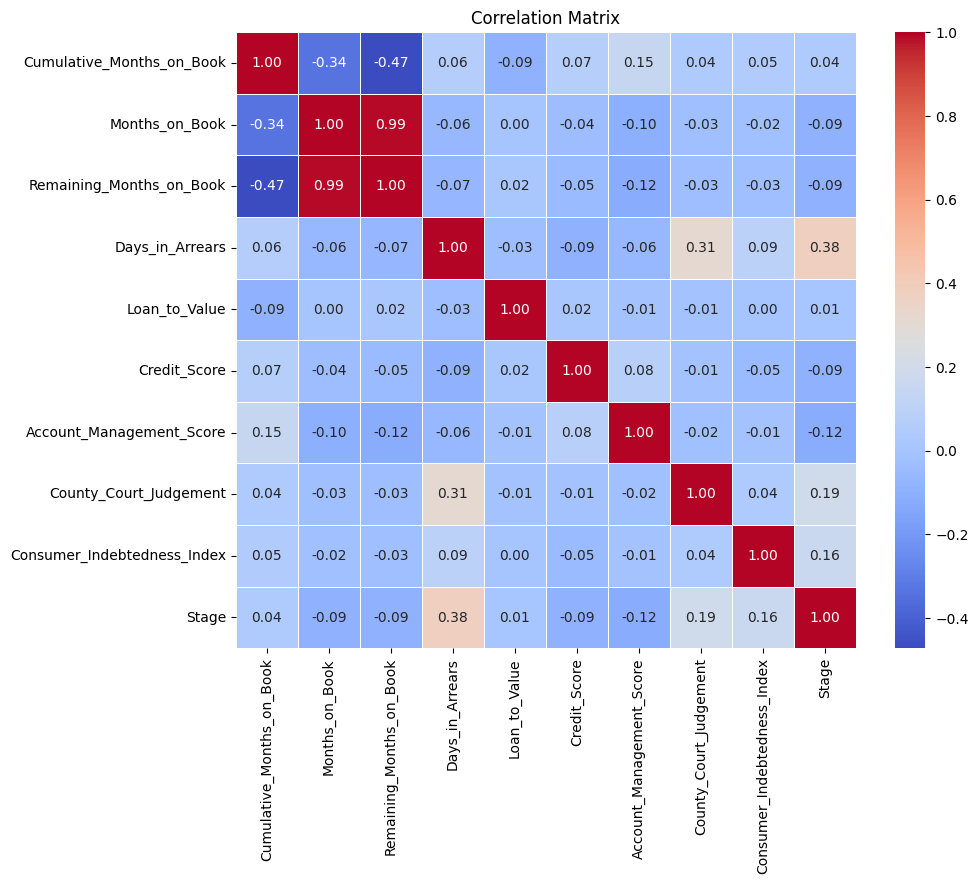

                             Cumulative_Months_on_Book  Months_on_Book  \
Cumulative_Months_on_Book                     1.000000       -0.336800   
Months_on_Book                               -0.336800        1.000000   
Remaining_Months_on_Book                     -0.472025        0.989058   
Days_in_Arrears                               0.063259       -0.061461   
Loan_to_Value                                -0.092169        0.004206   
Credit_Score                                  0.071065       -0.038672   
Account_Management_Score                      0.148134       -0.099300   
County_Court_Judgement                        0.041531       -0.025271   
Consumer_Indebtedness_Index                   0.049246       -0.018828   
Stage                                         0.043358       -0.087341   

                             Remaining_Months_on_Book  Days_in_Arrears  \
Cumulative_Months_on_Book                   -0.472025         0.063259   
Months_on_Book                       

In [ ]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.drop(columns=['Account_ID', 'Loan_Date', 'Company/Individual_Flag', 'Number_of_Searches_in_Last_Month', 'Public_Information_Sources']).corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Optional: Print the correlation matrix
print(correlation_matrix)


As shown above, `Months_on_Book` and `Remaining_Months_on_Book` are highly correlated, which is expected given their design. Aside from these, no other pairs of variables have a correlation higher than 0.8, indicating that strong multicollinearity is not present.

## 5.5 Summary Statistics of Final Data

In [ ]:
# Generate summary statistics for the numeric columns, including mean, median, min, and max values
numeric_summary = df.describe()

# Calculate median separately, since it's not included in describe by default
numeric_summary.loc['median'] = df.median(numeric_only=True)

# Display the summary statistics with mean, median, min, max for all numeric columns
numeric_summary

,Loan_Date,Company/Individual_Flag,Cumulative_Months_on_Book,Months_on_Book,Remaining_Months_on_Book,Days_in_Arrears,Loan_to_Value,Credit_Score,Account_Management_Score,County_Court_Judgement,Number_of_Searches_in_Last_Month,Public_Information_Sources,Consumer_Indebtedness_Index,Stage
count,1999,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,2020-08-10 06:39:04.772386048,0.653827,40.218609,174.565283,134.346673,6.375688,0.613556,45.299150,983.687977,4.785234,0.829915,0.659830,9.237619,1.157079
min,2016-05-12 00:00:00,0.000000,14.000000,24.000000,-11.000000,0.000000,0.000000,-30.000000,-999.000000,-1.000000,0.000000,-1.000000,-3.000000,1.000000
25%,2019-09-16 00:00:00,0.000000,28.000000,120.000000,66.000000,0.000000,0.554800,35.000000,1034.500000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,2020-12-17 00:00:00,1.000000,36.000000,120.000000,88.000000,0.000000,0.626300,45.000000,1198.500000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2021-08-07 12:00:00,1.000000,51.000000,240.000000,216.000000,0.000000,0.681900,55.000000,1281.000000,0.000000,1.000000,0.000000,9.000000,1.000000
max,2022-10-27 00:00:00,1.000000,91.000000,360.000000,342.000000,747.000000,10.000000,100.000000,1992.500000,999.000000,9.000000,72.000000,87.000000,11.000000
std,NaN,0.475868,15.465799,92.417935,98.706902,42.046788,0.301754,22.387223,654.560128,45.506925,1.484685,6.120932,15.544153,0.502585
median,NaN,1.000000,36.000000,120.000000,88.000000,0.000000,0.626300,45.000000,1198.500000,0.000000,0.000000,0.000000,3.000000,1.000000


In [ ]:
# Check the data's general information again as . strings are properly handled.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Account_ID                        1999 non-null   object        
 1   Loan_Date                         1999 non-null   datetime64[ns]
 2   Company/Individual_Flag           1999 non-null   int64         
 3   Cumulative_Months_on_Book         1999 non-null   int64         
 4   Months_on_Book                    1999 non-null   int64         
 5   Remaining_Months_on_Book          1999 non-null   int64         
 6   Days_in_Arrears                   1999 non-null   int64         
 7   Loan_to_Value                     1999 non-null   float64       
 8   Credit_Score                      1999 non-null   float64       
 9   Account_Management_Score          1999 non-null   float64       
 10  County_Court_Judgement            1999 non-null 

As shown above, the output indicates that variables previously recognized as object have been converted to float.

# 6.Target Variable

## 6.1 Target Variable definition
- Given the guidance, the target variable is based on the 'Stage' variable.

- Stage 3 indicates default ('1') and others (Stage 2 and Stage 1) indicate non-default ('0')

In [ ]:
# Create 'Default' column based on 'Stage' where Stage 3 indicates default (1) and others indicate non-default (0)
df['Default'] = df['Stage'].apply(lambda x: 1 if x == 3 else 0)

## 6.2 Target Variable Proportion
- In this section, we look at the proportion of the target variable, observing how many instances of 0s (non-defaults) and 1s (defaults) exist.

In [ ]:
# Look at the proporting of the target variable
df['Default'].value_counts()

,count
Default,
0,1960
1,39


**The proportion suggests that it's a low default portfolio.**

As shown above, the target variable is <font color = 'red'>highly imbalanced</font>, which could potentially casue bias in the output model.


- When the target variable in a dataset is highly imbalanced, one class or category is significantly more prevalent than the other.

- This imbalance can introduce bias into the model's output. Many machine learning algorithms, especially those that optimize for overall accuracy, tend to favor predicting the majority class more often simply because it appears more frequently in the data. As a result, the model may perform poorly on the minority class, leading to skewed predictions.

1. <font color = 'pink'> Accuracy Paradox</font>:

    The model may achieve high accuracy by always predicting the majority class, but it fails to correctly predict the minority class.

2. <font color = 'pink'> Misclassification of Minority Class</font>:

    The model may not learn to recognize patterns in the minority class, leading to poor performance (e.g., low recall or precision) for that class.

3. <font color = 'pink'> Evaluation Metrics</font>:

    Accuracy can be misleading in imbalanced data; it doesn’t reflect the model's performance on the minority class.

The code below will generate a bar graph of the target variable for visualization purposes.

In [ ]:
# Get value counts for the target variable
value_counts = df['Default'].value_counts()

# Filter value that is not 0
value_counts = value_counts[value_counts > 0]

# Plotly bar graph with text annotations showing the actual values
fig = go.Figure(data=[
    go.Bar(x=value_counts.index.astype(str), y=value_counts.values,
           marker_color='skyblue',
           text=value_counts.values,  # Add the count as text
           textposition='auto')  # Automatically position the text
])

fig.update_layout(
    title='Target Distribution',
    xaxis_title='Target',
    yaxis_title='Count',
    xaxis=dict(tickmode='auto')
)

fig.show()


# 7.Model Building
* In this section, we will apply `Logistic Regression` and `Decision Tree` models to determine which is more appropriate for our dataset.

* I will keep in mind that the data have **some outliers** and the **target variable is imbalanced.**

## 7.1 Calculate Information Value (IV)

Steps taken to calculate IV:

1. Grouping by Feature: The code groups the data by each bin or category of a feature and calculates the total number of records, events (positive class), and non-events (negative class).

2. Handling Zero Events/Non-Events: The code adds a small value (0.5) to prevent division by zero.

3. WOE Calculation: Weight of Evidence (WOE) is calculated using the log of the ratio of the distribution of events to non-events.

4. IV Calculation: IV is calculated as the sum of the WOE multiplied by the difference between the event and non-event distribution.

In [ ]:
# Function to calculate WOE and IV for a single feature
def calculate_woe_iv(data, feature, target):
    df = pd.DataFrame()
    df['total'] = data.groupby(feature)[target].count()
    df['events'] = data.groupby(feature)[target].sum()
    df['non_events'] = df['total'] - df['events']

    # Handling zero division
    df['events'] = np.where(df['events'] == 0, 0.5, df['events'])
    df['non_events'] = np.where(df['non_events'] == 0, 0.5, df['non_events'])

    # Calculate distribution of events and non-events
    df['dist_events'] = df['events'] / df['events'].sum()
    df['dist_non_events'] = df['non_events'] / df['non_events'].sum()

    # Calculate WOE
    df['woe'] = np.log(df['dist_events'] / df['dist_non_events'])

    # Calculate IV
    df['iv'] = (df['dist_events'] - df['dist_non_events']) * df['woe']

    # Return the IV value for the feature
    return df['iv'].sum()

# Calculate IV for each feature
features = df.drop(columns=['Account_ID', 'Loan_Date', 'Stage'])

iv_values = {}
for feature in features:
    iv_values[feature] = calculate_woe_iv(df, feature, 'Default')  # Replace 'target_variable' with your actual target variable

# Convert to a DataFrame for easier viewing
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)

# Display the IV values
print(iv_df)


                             Feature         IV
12                           Default  12.467454
4                    Days_in_Arrears   3.742749
8             County_Court_Judgement   1.775963
7           Account_Management_Score   1.489665
10        Public_Information_Sources   1.349730
2                     Months_on_Book   1.209629
1          Cumulative_Months_on_Book   1.071201
3           Remaining_Months_on_Book   1.009478
6                       Credit_Score   0.975769
11       Consumer_Indebtedness_Index   0.922890
9   Number_of_Searches_in_Last_Month   0.222118
5                      Loan_to_Value   0.217755
0            Company/Individual_Flag   0.158265


As shown above, the decision was made to exclude `Company/Individual_Flag` and `Number_of_Searches_in_Last_Month` due to their low predictive power.

Although `Loan_to_Value` has low predictive power, it is retained because LTV is widely considered an important variable in credit risk modeling.

## 7.2. Traing-Test Split

In [ ]:
# Drop columns to get the feature matrix
X = df.drop(columns=['Account_ID', 'Loan_Date', 'Stage', 'Company/Individual_Flag', 'Number_of_Searches_in_Last_Month', 'Default'])

# Extract the 'Default' column as the target variable
y = df['Default']

# Split the data into training and test sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

*Note: A 20% test size is typically used for the train-test split. However, due to the imbalance in the target variable, a 40% test size was used instead.*

*Note: parameter `stratify=y` was used in a train-test split to ensure that the proportion of each class in the target variable y is preserved in both the training and test sets. (due to the imbalance in the target variable)*



## 7.3. Logistic Regression

Explanation on the paramter used for this model:

max_iter=1000:
- It specifies the maximum number of iterations the optimization algorithm is allowed to run before it stops.

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = logistic_model.predict(X_test)

# Generating the classification report
report = classification_report(y_test, y_pred)
print(report)

# Optional: Perform cross-validation to check for overfitting
cv_scores_log = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_scores_log}")
print(f"Mean CV AUC Score: {cv_scores_log.mean():.4f}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       784
           1       1.00      0.38      0.55        16

    accuracy                           0.99       800
   macro avg       0.99      0.69      0.77       800
weighted avg       0.99      0.99      0.98       800

Cross-Validation AUC Scores: [0.93446809 0.99744681 0.81617021 0.86758475 0.8       ]
Mean CV AUC Score: 0.8831


* The results above indicate that the model demonstrates strong overall performance with an accuracy of 99%, achieving high precision and recall for the majority class (0).

* However, while the model achieves perfect precision for the minority class (1), its recall is lower at 38%, indicating that it misses a significant portion of the minority class instances.

* Given the imbalanced target variable and the presence of a small number of outliers, the model effectively handles the majority class but could benefit from further improvement in detecting the minority class instances.

* The cross-validation AUC scores range from 0.80 to 0.997, with a mean AUC score of 0.8831. This suggests variability in the model's performance across different folds, highlighting the need for strategies to improve consistency and minority class detection.

ROC AUC Score: 0.90


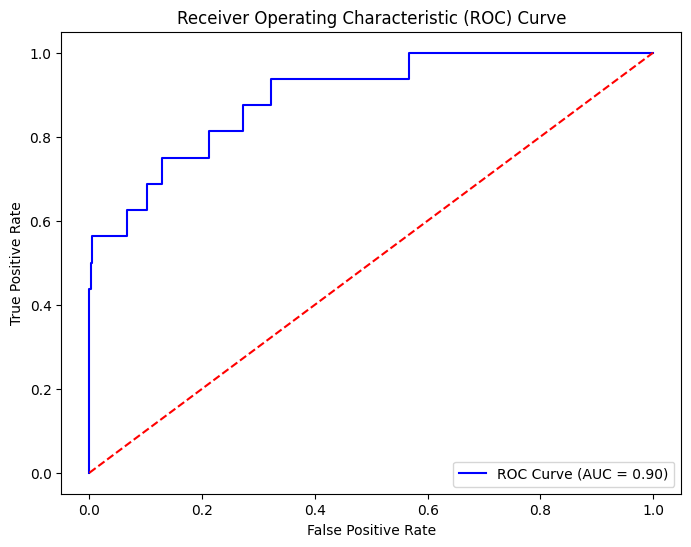

In [ ]:
# Get predicted probabilities for the test set (for class 1)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* The ROC curve with an AUC of 0.90 indicates that the model has a strong ability to distinguish between the classes. An AUC of 0.90 suggests that the model performs well in differentiating between positive and negative instances, but it may not necessarily indicate overfitting. However, given the imbalance in the data, it's important to also consider precision, recall, and the behavior of the model on the minority class (defaults) to ensure balanced performance across both classes.

### 7.3.1 Check Overfitting for Logistic Regression Model
- In this section, we check for overfitting by evaluating the model's performance on both the training and test sets.

- If the model performs significantly better on the training set than on the test set, it may indicate overfitting, where the model has learned the training data too well but struggles to generalize to unseen data.

In [ ]:
# Train set evaluation - AUC
y_train_prob = logistic_model.predict_proba(X_train)[:, 1]  # Get predicted probabilities for class 1
train_auc = roc_auc_score(y_train, y_train_prob)
print(f"Training Set AUC: {train_auc:.4f}")

# Test set evaluation - AUC
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1
test_auc = roc_auc_score(y_test, y_test_prob)
print(f"Test Set AUC: {test_auc:.4f}")

# Train set evaluation - Classification reports
y_train_pred = logistic_model.predict(X_train)
print("Training Set Classification Report")
print(classification_report(y_train, y_train_pred))

# Test set evaluation - Classification reports
y_test_pred = logistic_model.predict(X_test)
print("Test Set Classification Report")
print(classification_report(y_test, y_test_pred))

Training Set AUC: 0.9238
Test Set AUC: 0.8952
Training Set Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1176
           1       0.92      0.48      0.63        23

    accuracy                           0.99      1199
   macro avg       0.95      0.74      0.81      1199
weighted avg       0.99      0.99      0.99      1199

Test Set Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       784
           1       1.00      0.38      0.55        16

    accuracy                           0.99       800
   macro avg       0.99      0.69      0.77       800
weighted avg       0.99      0.99      0.98       800



The result above suggests that:
- The AUC values for both the training and test sets are high, suggesting that the model can generally distinguish well between classes. However, the slight drop from 0.9238 (training) to 0.8952 (test) indicates <font color = 'orange'>a mild overfitting</font> issue.


<font size="5">**Precision, Recall, and F1-Score:**</font>
* **Training Set:**

Class 0: Precision and recall are nearly perfect, which is expected since most samples belong to this class.
Class 1: Precision is high at 0.92, indicating that when the model predicts class 1, it is correct most of the time. However, the recall is only 0.48, meaning that it struggles to identify the minority class (defaults) correctly.
Macro Avg Recall: 0.74 suggests that the model's overall ability to identify both classes is skewed, performing much better for the majority class than the minority.

* **Test Set:**

Class 0: Precision and recall remain high, as expected due to the class imbalance.
Class 1: Precision improves to 1.00 (because when it does predict a 1, it is always correct), but recall drops further to 0.38, indicating that it captures even fewer defaults compared to the training set.
Macro Avg Recall: 0.69, which is slightly lower than in the training set, again showing that the model struggles with the minority class in a similar way during both training and testing.

* <font color = 'grey'>*Note: Precision is about being right when you predict something. Recall is about not missing any of the real cases.* </font>

<font size="5">**Overfitting Indications:**</font>
* **High Accuracy with Low Recall for Minority Class:**
The model shows a very high accuracy (99%) in both training and test sets, but this metric is misleading because it is mainly driven by the model’s performance on class 0.
The drop in recall for class 1 from the training set (0.48) to the test set (0.38) is a sign of overfitting. The model has learned the patterns of the training data well but struggles to generalize for the minority class in new data (test set).

* **AUC Discrepancy:**
The slight drop in AUC from training (0.9238) to testing (0.8952) further supports the idea that the model is overfitted to some extent. It has learned too many details from the training data that may not be present in the test set.

## 7.4 Constrained Decision Tree

Some explanation on parameters used for this model:

max_depth=10:
- Meaning: Limits the maximum depth of the tree to 10 levels.
- Impact: This prevents the tree from growing too deep, reducing the risk of overfitting. A deeper tree captures more complexity but can overfit the training data, while a shallower tree generalizes better.

min_samples_leaf=26:

- Meaning: Each leaf (end node) must have at least 26 samples.
- Impact: This helps control overfitting by preventing the tree from creating very small, specific leaves that could overly fit the training data. A higher number means more generalization, as fewer splits are allowed.

min_samples_split=20:

- Meaning: A node must have at least 20 samples before it can be split.
- Impact: This ensures that nodes don't split unless they contain at least 20 samples, preventing splits that might lead to overfitting or creating overly specific patterns from small subsets of the data.

max_features='sqrt':

- Meaning: When splitting a node, the tree considers the square root of the total number of features as candidates for the best split.
- Impact: This is a common setting for decision trees in ensemble methods like Random Forests. It adds randomness to the model and reduces overfitting by not considering all features at every split.

max_leaf_nodes=50:

- Meaning: Limits the number of leaf nodes (end nodes) to 50.
Impact: This further restricts the complexity of the tree, capping the number of terminal nodes, and helps prevent overfitting by limiting the model's ability to fit noise in the data.

In [ ]:
# Adjust the Decision Tree parameters to reduce overfitting
decision_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=26, min_samples_split=20, max_features = 'sqrt', max_leaf_nodes= 50, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict probabilities for class 1 (default)
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Set a threshold (you can adjust this as needed)
threshold = 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate the model
print("Classification Report with Decision Tree:")
print(classification_report(y_test, y_pred_adjusted))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Optional: Perform cross-validation to check for overfitting
cv_scores_tree = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_scores_tree}")
print(f"Mean CV AUC Score: {cv_scores_tree.mean():.4f}")


Classification Report with Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       784
           1       0.82      0.56      0.67        16

    accuracy                           0.99       800
   macro avg       0.90      0.78      0.83       800
weighted avg       0.99      0.99      0.99       800

ROC AUC Score: 0.9133
Cross-Validation AUC Scores: [0.88       0.98723404 0.77404255 0.65730932 0.93670213]
Mean CV AUC Score: 0.8471


From the result above, we can confirm a few points.
- **Strong Performance on the Majority Class (0)**: The decision tree model is highly effective at predicting the majority class (non-default), but this is not surprising given the imbalanced nature of the dataset.
- **Weakness in Identifying the Minority Class (1)**: The model struggles to recall the minority class (defaults), suggesting it may not be effectively identifying defaults, which is crucial in credit risk modeling.
- **Model Stability**: The variability in cross-validation AUC scores suggests that the model's performance is not consistent across different data splits, and further tuning or more advanced methods (e.g., random forests, boosting, or handling class imbalance more effectively) could improve generalization.

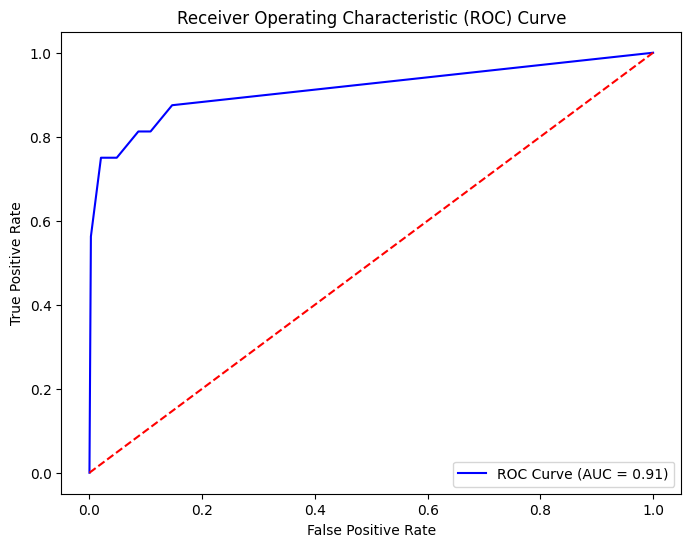

In [ ]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### 7.4.1 Check Overfitting for Decision Tree Model
- In this section, we check for overfitting by evaluating the model's performance on both the training and test sets.

- If the model performs significantly better on the training set than on the test set, it may indicate overfitting, where the model has learned the training data too well but struggles to generalize to unseen data.

In [ ]:
# Train set evaluation - AUC
y_train_prob = decision_tree_model.predict_proba(X_train)[:, 1]  # Get predicted probabilities for class 1
train_auc = roc_auc_score(y_train, y_train_prob)
print(f"Training Set AUC: {train_auc:.4f}")

# Test set evaluation - AUC
y_test_prob = decision_tree_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for class 1
test_auc = roc_auc_score(y_test, y_test_prob)
print(f"Test Set AUC: {test_auc:.4f}")

# Train set evaluation - Classification reports
y_train_pred = decision_tree_model.predict(X_train)
print("Training Set Classification Report")
print(classification_report(y_train, y_train_pred))

# Test set evaluation - Classification reports
y_test_pred = decision_tree_model.predict(X_test)
print("Test Set Classification Report")
print(classification_report(y_test, y_test_pred))

Training Set AUC: 0.9766
Test Set AUC: 0.9133
Training Set Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1176
           1       0.52      0.61      0.56        23

    accuracy                           0.98      1199
   macro avg       0.76      0.80      0.78      1199
weighted avg       0.98      0.98      0.98      1199

Test Set Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       784
           1       0.82      0.56      0.67        16

    accuracy                           0.99       800
   macro avg       0.90      0.78      0.83       800
weighted avg       0.99      0.99      0.99       800



The results suggest:

* AUC Difference: The drop from 0.9766 (training) to 0.9133 (test) indicates <font color = 'orange'>a mild overfitting</font>, but the model still generalizes reasonably well.

* Performance on Class 1: Precision improves on the test set (0.82), but recall drops to 0.56, showing the model struggles to identify all instances of the minority class.

* Bias Toward Majority Class: The model performs very well on class 0 but misses many class 1 cases, typical of imbalanced datasets.

* Overall: The model is well-tuned but could use techniques like resampling or threshold adjustment to improve recall for the minority class.

# 8.Conclusion

- The **Decision Tree model** showed strong performance on the majority class (non-defaults) but struggled with identifying the minority class (defaults), which is important for credit risk models. Mild overfitting was present, but the Decision Tree had a better balance between precision and recall for both classes compared to logistic regression.

# 9.Final Recommendation

- The Decision Tree model is better suited for this dataset due to its robustness in handling outliers and lower sensitivity to multicollinearity.

- Although the model is performing well, it can be further enhanced by addressing the class imbalance more effectively, through methods such as SMOTE, undersampling, or exploring more advanced techniques like Random Forests or Gradient Boosting, which could further improve the model's ability to generalize across classes, especially in predicting defaults (class 1).

# 10.Next Steps
- Explore different methods to handle class imbalance (e.g., resampling techniques such as SMOTE, bootstrapping, etc.).

- Implement advanced techniques to address overfitting (e.g., Ensemble Models, Neural Networks, Data Augmentation, etc.).